Creating images for figure 4 of publication "Does Amount of Information Support Aesthetic Values?"

https://www.frontiersin.org/articles/10.3389/fnins.2022.805658/full

In [1]:
import cv2 as cv
import imutils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 4a

Import original image image

In [2]:
# imagePath=r"C:\Users\al33m\OneDrive\Pictures\monet_copy.jpg"
imagePath=r"C:\Users\al33m\OneDrive\Pictures\fallTrees.jpg"
# imagePath=r"C:\Users\al33m\OneDrive\Pictures\butterfly_16x9_0.jpg"

In [49]:
rgbImg=cv.imread(imagePath,cv.IMREAD_UNCHANGED)

In [27]:
np.shape(rgbImg)

(900, 1200, 3)

In [57]:
def reduceResolution(img):
    scale_percent = 33 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    return(resized)

In [68]:
rgbImg=reduceResolution(cv.imread(imagePath,cv.IMREAD_UNCHANGED))

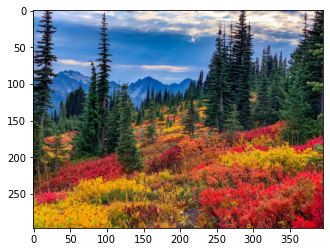

In [59]:
plt.imshow(cv.cvtColor(rgbImg,cv.COLOR_BGR2RGB))

In [69]:
cv.imshow('or',rgbImg)
cv.waitKey(0)

-1

# 4b

image with the Pixels of the Original Scrambled.

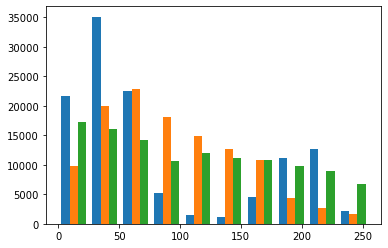

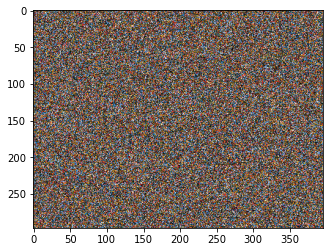

In [60]:
rndImg1 = np.reshape(rgbImg, (rgbImg.shape[0] * rgbImg.shape[1], rgbImg.shape[2]))
# this like could also be written using -1 in the shape tuple
# this will calculate one dimension automatically
# rndImg2 = np.reshape(rgbImg, (-1, rgbImg.shape[2]))
plt.hist(rndImg1)
plt.show()


#now shuffle
np.random.shuffle(rndImg1)

#and reshape to original shape
rdmImg = np.reshape(rndImg1, rgbImg.shape)

plt.imshow(cv.cvtColor(rdmImg,cv.COLOR_BGR2RGB))
plt.show()

In [61]:
cv.imshow('random',rdmImg)
cv.waitKey(0)

97

In [ ]:
# rgbImg=cv.imread(r"C:\Users\al33m\Downloads\butterfly_16x9_0.jpg")
# for i in np.arange(np.shape(rgbImg)[0]):
#     for k in np.arange(np.shape(rgbImg)[1]):
#         rgbImg[i,k]=rgbImg[np.random.randint(np.shape(rgbImg)[0]),np.random.randint(np.shape(rgbImg)[1])]
# plt.imshow(rgbImg)

# doesnt' work because not all pixels are picked. needs to be shuffled!

# 4 c

Image with the Hues of the Original Randomized.

In [ ]:
# # http://sunny.today/generate-random-integers-with-fixed-sum/
# rgbImg2=cv.imread(imagePath)
# for i in tqdm(np.arange(np.shape(rgbImg2)[0])):
#     for k in np.arange(np.shape(rgbImg2)[1]):

#         currentSum=np.sum(rgbImg2[i,k])#what's the current total
#         if currentSum==0:
#             rnd_array=[0,0,0]
#         else:
#             rnd_array=np.random.multinomial(currentSum, np.ones(3)/3, size=1)[0]
#             rgbImg2[i,k]=rnd_array
#             assert np.sum(rnd_array)==currentSum

# cv.imshow('foo',rgbImg2)
# cv.waitKey(0)

100%|████████████████████████████████████████████████████████████████████████████████| 297/297 [00:07<00:00, 39.40it/s]


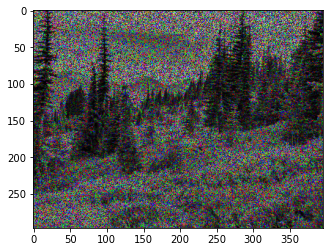

In [63]:
rgbImg=reduceResolution(cv.imread(imagePath,cv.IMREAD_UNCHANGED))
zt=0
lt=0
gt=0
for i in tqdm(np.arange(np.shape(rgbImg)[0])):
    for k in np.arange(np.shape(rgbImg)[1]):

        currentSum=np.sum(rgbImg[i,k])#what's the current total
        if currentSum==0:
            nr=0
            ng=0
            nb=0
            zt+=1
        else:
            if currentSum<255:#if current sum is less than max value, set that as max value
                nr=np.random.randint(0,currentSum)#pick first to currentSum
                ng=np.random.randint(0,currentSum-nr)#pick second from what's left over
                sumSofar=nr+ng
                nb=np.random.randint(0,currentSum-sumSofar)
                lt+=1
                
            else:
                nr=np.random.randint(0,255)#pick first to 255
                ng=np.random.randint(0,currentSum-nr)#pick second from what's left over
                sumSofar=nr+ng
                nb=np.random.randint(0,currentSum-sumSofar)
                gt+=1

        newSum=np.sum([nr,ng,nb])
        if newSum>currentSum:
            print(newSum)
            print(currentSum)
            break

        assert np.sum([nr,ng,nb])<=currentSum
        rgbImg[i,k]=np.random.permutation([nr,ng,nb])
        
        

plt.imshow(cv.cvtColor(rgbImg,cv.COLOR_BGR2RGB))

In [65]:
cv.imshow('2',rgbImg)
cv.waitKey(0)

-1

In [ ]:
np.random.randint(np.shape(rgbImg)[0])

In [ ]:
rgbImg[1,2]

# 4 D

Image with the Intensities of the Original Randomized. 

In [ ]:
np.round(rgbImg[0,1]*0.5)

In [ ]:
(rgbImg[0,1])

In [ ]:
np.random.random()

In [ ]:
np.array([rgbImg[0,0][0],rgbImg[0,0][1],rgbImg[0,0][2]])

(array([102., 113.,  88.,  98.,  95.,  80., 116.,  94., 111., 103.]),
 array([0.00389354, 0.20346147, 0.4030294 , 0.60259733, 0.80216527,
        1.0017332 , 1.20130113, 1.40086906, 1.60043699, 1.80000492,
        1.99957286]),
 <BarContainer object of 10 artists>)

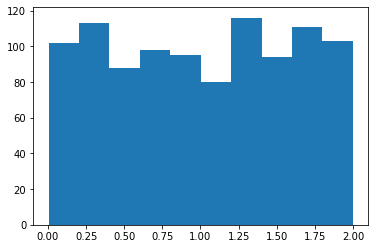

In [14]:
plt.hist(np.random.uniform(0,2,1000))

In [66]:
rgbImg3=reduceResolution(cv.imread(imagePath,cv.IMREAD_UNCHANGED))
for i in tqdm(np.arange(np.shape(rgbImg)[0])):
    for k in np.arange(np.shape(rgbImg)[1]):
        foo=np.round(rgbImg3[i,k]*np.random.uniform(0,2)) #scale randomly and then round
        rgbImg3[i,k]=np.clip(foo,0,255)
cv.imshow('g',rgbImg3)
cv.waitKey(0)

100%|████████████████████████████████████████████████████████████████████████████████| 297/297 [00:03<00:00, 77.59it/s]


-1

In [ ]:
plt.imshow(rgbImg3)

In [ ]:
plt.hist(np.reshape(rgbImg3, (rgbImg3.shape[0] * rgbImg3.shape[1], rgbImg3.shape[2])))

## 4F

Monochromatic Image with the Mean Color of the Original. 

In [70]:
rgbImg=reduceResolution(cv.imread(imagePath,cv.IMREAD_UNCHANGED))

In [8]:
from scipy.spatial.distance import cdist
import seaborn as sns
from skimage import io
from PIL import Image

In [80]:
np.shape(rgbImg[0,0].reshape(1,3))

(1, 3)

In [82]:
cdist(rgbImg[0,0].reshape(1,3)
      ,rgbImg[0,1].reshape(1,3))

array([[3.46410162]])

In [83]:
rgbImg[0,1].reshape(1,3)

array([[238, 205, 186]], dtype=uint8)

In [89]:
np.shape(rgbImg)

(297, 396, 3)

In [91]:
rgbFlat=np.reshape(rgbImg,(np.shape(rgbImg)[0]*np.shape(rgbImg)[1],3))

In [338]:
exampleIndx=np.random.randint(0,len(rgbFlat),16)
exampleImgFlat=rgbFlat[exampleIndx]
exampleImg=np.reshape(exampleImgFlat,(4,4,3))

In [121]:
np.shape(exampleImg)

(4, 4, 3)

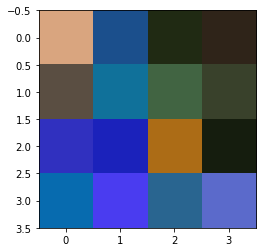

In [339]:
plt.imshow(exampleImg)

<AxesSubplot:>

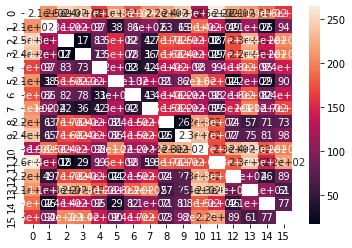

In [340]:
lookupTable=cdist(exampleImgFlat,exampleImgFlat)
np.fill_diagonal(lookupTable,np.nan)
sns.heatmap(lookupTable,annot=True)

In [211]:
#pick one index at random
#total items is 4



array([125,  97,  63], dtype=uint8)

In [213]:
closestIdx=np.argsort(lookupTable[0])[0]
exampleImgFlat[closestIdx]

array([55, 89, 59], dtype=uint8)

In [224]:
newImg=np.empty_like(exampleImg)

In [226]:
np.shape(newImg)

(2, 2, 3)

In [228]:
newImg[0,0]=exampleImg[0,0]

In [229]:
newImg[0,1]=exampleImgFlat[closestIdx]

In [230]:
newImg

array([[[125,  97,  63],
        [ 55,  89,  59]],

       [[  1,   1,   1],
        [  1,   1,   1]]], dtype=uint8)

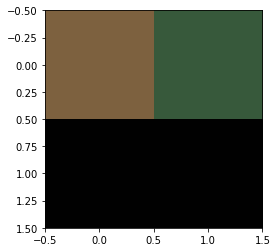

In [231]:
plt.imshow(newImg)b


In [351]:
img=io.imread(imagePath)


In [359]:
img.shape

(900, 1200, 3)

In [362]:
rgbImg.shape

(297, 396, 3)

In [395]:
297*396

117612

In [377]:
avcol=[np.mean(pd.DataFrame(rgbImg.reshape(117612,3)).iloc[:,0]),
 np.mean(pd.DataFrame(rgbImg.reshape(117612,3)).iloc[:,1]),
 np.mean(pd.DataFrame(rgbImg.reshape(117612,3)).iloc[:,2])]

In [381]:
len(np.tile(avcol,117612))

352836

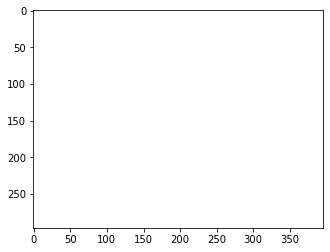

In [392]:
plt.imshow(np.round(np.reshape((np.tile(avcol,117612)),np.shape(rgbImg))))

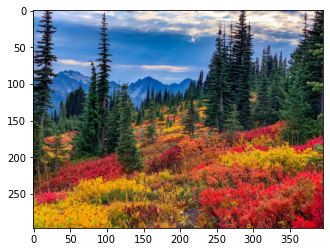

In [401]:
plt.imshow(cv.cvtColor(rgbImg,cv.COLOR_BGR2RGB))

In [403]:
avimg=np.reshape(np.tile([84,94,109],117612),np.shape(rgbImg))

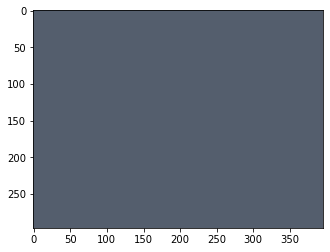

In [405]:
plt.imshow(avimg)

In [389]:
np.round(np.reshape((np.tile(avcol,117612)),np.shape(rgbImg)))

array([[[ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        ...,
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.]],

       [[ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        ...,
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.]],

       [[ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        ...,
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.]],

       ...,

       [[ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        ...,
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.]],

       [[ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        ...,
        [ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  94., 109.]],

       [[ 85.,  94., 109.],
        [ 85.,  94., 109.],
        [ 85.,  

In [399]:
cv.imshow('foo',np.reshape(np.tile([84,94,109],117612),np.shape(rgbImg)))
cv.waitKey(0)

error: OpenCV(4.5.3) C:/Users/runneradmin/AppData/Local/Temp/pip-req-build-q3d_8t8e/opencv/modules/highgui/src/precomp.hpp:155: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


# 4E

Image with the Pixels of the Original Moved Near Other Pixels with Similar Color and Intensity.

In [4]:
from pixelsort import pixelsort

In [10]:
a=Image.open(imagePath)

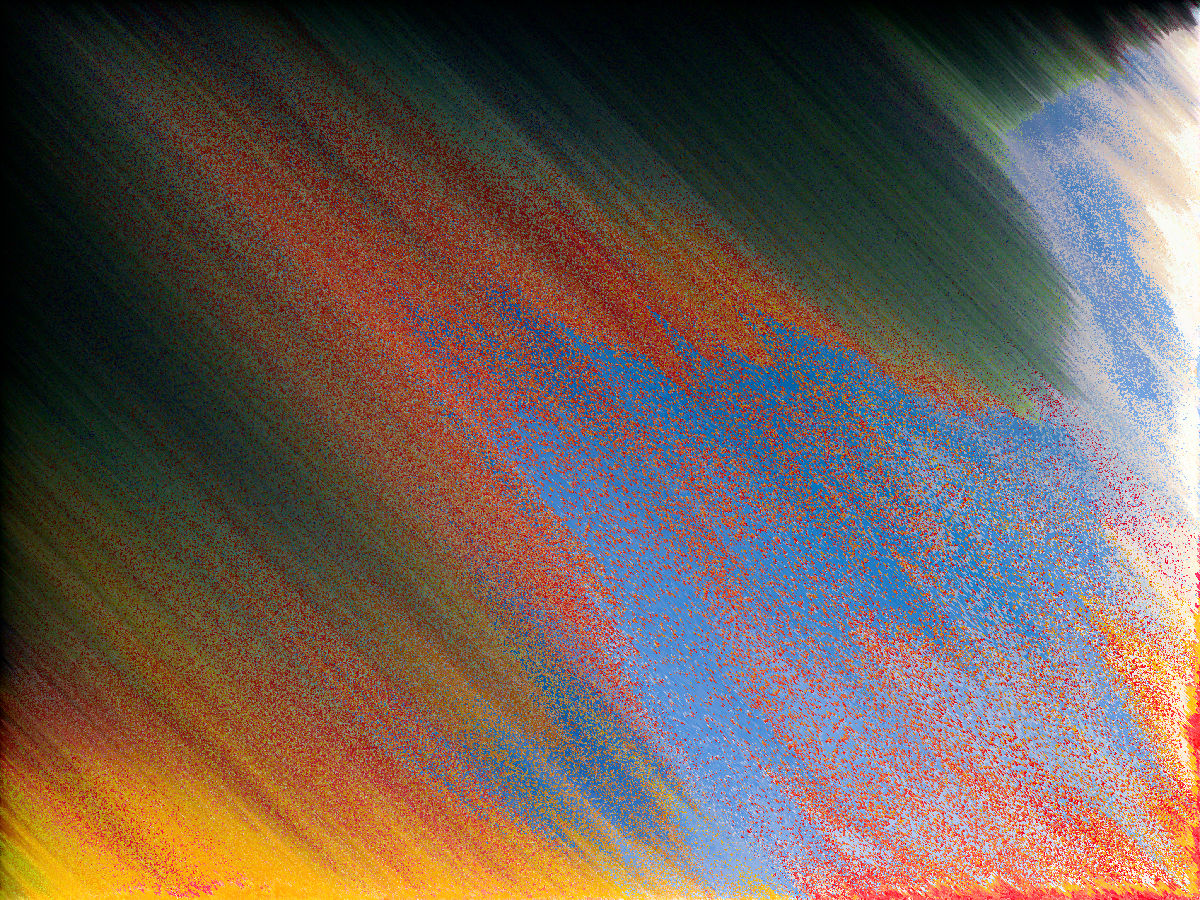

In [46]:
pixelsort(
    a,
    mask_image=None,
    interval_image=None,
    randomness=0,
    clength=0,
    angle=45,
    sorting_function='lightness',
    interval_function='none'
)